<a href="https://colab.research.google.com/github/nojiyoon/SeSAC_code/blob/main/1%EC%9B%9420%EC%9D%BC_%EB%B6%84%EC%82%B0_%ED%91%9C%EC%A4%80%ED%8E%B8%EC%B0%A8_%EA%B3%B5%EB%B6%84%EC%82%B0_%EC%83%81%EA%B4%80%EA%B4%80%EA%B3%84_%EC%88%98%EC%97%85%EB%82%B4%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [146]:
import pandas as pd

In [147]:
A = pd.DataFrame({'sal':[1200, 1600, 5600, 6000, 7000]})

In [148]:
A

,sal
0,1200
1,1600
2,5600
3,6000
4,7000


In [149]:
# A회사 연봉의 평균
A.mean()

sal    4280.0
dtype: float64

In [150]:
# 편차
A - A.mean()

,sal
0,-3080.0
1,-2680.0
2,1320.0
3,1720.0
4,2720.0


In [151]:
# B회사 연봉
B = pd.DataFrame({'sal':[4000, 4500, 4250, 5000, 3650]})

In [152]:
B

,sal
0,4000
1,4500
2,4250
3,5000
4,3650


In [153]:
# B회사 연봉의 평균
B.mean()

sal    4280.0
dtype: float64

In [154]:
# B회사 월급의 편차
B - B.mean()

,sal
0,-280.0
1,220.0
2,-30.0
3,720.0
4,-630.0


### 분산
- 편차 제곱을 데이터의개수-1 로 나눈것
- 데이터의 차이를 하나의 숫자로 나타냄

In [155]:
import math

In [156]:
(A-A.mean())**2

,sal
0,9486400.0
1,7182400.0
2,1742400.0
3,2958400.0
4,7398400.0


- [자유도(n-1)에 대한 설명](https://m.blog.naver.com/sw4r/221021838997)

In [157]:
# A회사의 분산을 계산 : 편차 제곱의 합을 (데이터개수-1)로 나눔
((A-A.mean())**2).sum() / (5-1)

sal    7192000.0
dtype: float64

In [158]:
# B회사의 분산을 계산
((B-B.mean())**2).sum() / 4

sal    260750.0
dtype: float64

In [159]:
# A회사의 분산
A.var()

sal    7192000.0
dtype: float64

In [160]:
# B회사의 분산
B.var()

sal    260750.0
dtype: float64

### 표준편차
- 분산에 루트를 계산

In [161]:
# A회사의 표준편차 계산
math.sqrt( ((A-A.mean())**2).sum() / 4)

2681.790446697877

In [162]:
# B회사의 표준편차 계산
math.sqrt( ((B-B.mean())**2).sum() / 4)

510.63685726747144

In [163]:
# A회사의 표준편차
A.std()

sal    2681.790447
dtype: float64

In [164]:
# B회사의 표준편차
B.std()

sal    510.636857
dtype: float64

### 공분산
- 두개의 컬럼 X와 Y가 있을때 컬럼1이 증가할때 컬럼2가 같이 증가하는가 아니면 감소하는가를 나타내는 지표
- "영어 점수가 낮으면 국어점수도 낮은가?"

In [165]:
# 영어점수와 국어점수를 저장하는 데이터프레임
df01 = pd.DataFrame({'eng_rank':[1,4,2,9,9], 'kor_rank':[3,2,7,3,10]})

In [166]:
# 영어점수 평균
eng_mean = df01['eng_rank'].mean()

In [167]:
eng_mean

5.0

In [168]:
# 국어점수 평균
kor_mean = df01['kor_rank'].mean()

In [169]:
kor_mean

5.0

In [170]:
# 영어 점수에서 영어 점수 평균을 뺌
eng_sub = df01['eng_rank'] - eng_mean
eng_sub

0   -4.0
1   -1.0
2   -3.0
3    4.0
4    4.0
Name: eng_rank, dtype: float64

In [171]:
# 국어 점수에서 국어 점수 평균을 뺌
kor_sub = df01['kor_rank'] - kor_mean
kor_sub

0   -2.0
1   -3.0
2    2.0
3   -2.0
4    5.0
Name: kor_rank, dtype: float64

In [172]:
# 수의 의미: 예를들어 국어는 짱잘하고 영어는 짱못하면 엄청큰 음수 나옴. 국어도 잘하고 영어도 잘하면 양수
eng_sub*kor_sub

0     8.0
1     3.0
2    -6.0
3    -8.0
4    20.0
dtype: float64

In [173]:
# 공분산이 0이 아니고 양수: 영어점수가 증가하면 국어점수도 증가. 영어점수 감소하면 국어 점수도 감소.
sum(eng_sub*kor_sub) / 4

4.25

In [174]:
# 공분산 조회
df01.cov()

,eng_rank,kor_rank
eng_rank,14.50,4.25
kor_rank,4.25,11.50


In [175]:
# 왼쪽부터 대각선은 영어의 분산, 국어의 분산
print(df01['eng_rank'].var())
print(df01['kor_rank'].std() ** 2)

14.5
11.5


### 상관관계
- 공분산을 X와 Y의 표준편차(X, Y에 저장된 값들의 차이)로 나눠서 비율을 조회
- 숫자값이 저장된 컬럼 사이의 상관관계를 계산

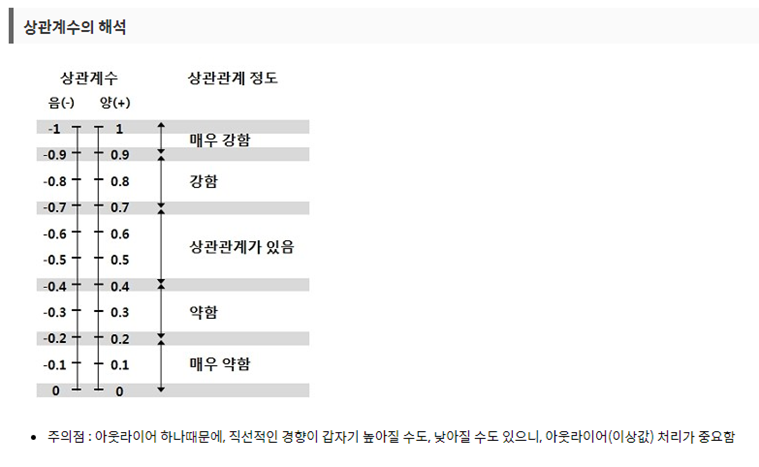

#### 상관 관계의 계산
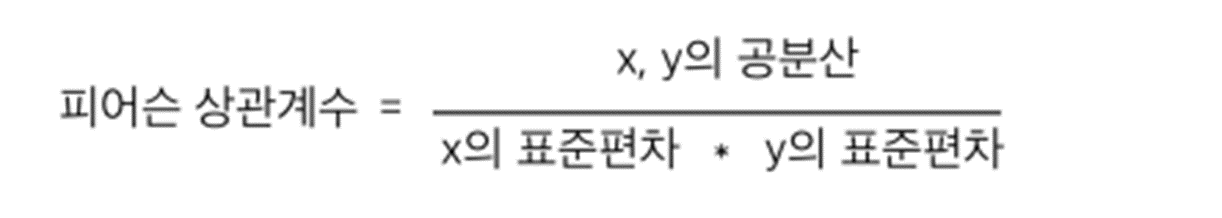

In [176]:
( df01['eng_rank'] - 5 ) ** 2

0    16
1     1
2     9
3    16
4    16
Name: eng_rank, dtype: int64

In [177]:
( df01['kor_rank'] - 5 ) ** 2

0     4
1     9
2     4
3     4
4    25
Name: kor_rank, dtype: int64

In [178]:
# 영어점수의 분산
sum(( df01['eng_rank'] - 5 ) ** 2) / 4

14.5

In [179]:
# 국어점수의 분산
sum(( df01['kor_rank'] - 5 ) ** 2) / 4

11.5

In [180]:
# 영어점수의 표준편차
math.sqrt(sum(( df01['eng_rank'] - 5 ) ** 2) / 4)

3.8078865529319543

In [181]:
# 국어점수의 표준편차
math.sqrt(sum(( df01['kor_rank'] - 5 ) ** 2) / 4)

3.391164991562634

In [182]:
# 상관관계 조회
df01.cov() / (df01['eng_rank'].std() * df01['kor_rank'].std())

,eng_rank,kor_rank
eng_rank,1.122884,0.329121
kor_rank,0.329121,0.890564


In [183]:
# 상관관계 조회
df01.corr()

,eng_rank,kor_rank
eng_rank,1.000000,0.329121
kor_rank,0.329121,1.000000


#### 예: 영어점수와 국어점수가 같다면 상관계수는?
- 영어 평균 3, 국어평균 3

In [184]:
df01 = pd.DataFrame({
    'eng_rank': [1,2,3,4,5],
    'kor_rank': [1,2,3,4,5]
})

In [185]:
# 영어 편차 (영어 - 영어 평균)
df01['eng_rank'] - 3

0   -2
1   -1
2    0
3    1
4    2
Name: eng_rank, dtype: int64

In [186]:
# 국어 편차 (국어 - 국어 평균)
df01['kor_rank'] - 3

0   -2
1   -1
2    0
3    1
4    2
Name: kor_rank, dtype: int64

In [187]:
# 대각선이 공분산
df01.cov()

,eng_rank,kor_rank
eng_rank,2.5,2.5
kor_rank,2.5,2.5


In [188]:
# 두 점수가 같을 때 상관계수는 1이 된다.
df01.cov() / (df01['eng_rank'].std()*df01['kor_rank'].std())

,eng_rank,kor_rank
eng_rank,1.0,1.0
kor_rank,1.0,1.0


In [189]:
# 상관 관계 조회
df01.corr()

,eng_rank,kor_rank
eng_rank,1.0,1.0
kor_rank,1.0,1.0


#### 예: 영어점수와 국어점수가 반대로 되어있다면 상관계수는? -1.
- 영어 평균 3, 국어평균 3

In [190]:
df01 = pd.DataFrame({
    'eng_rank': [1,2,3,4,5],
    'kor_rank': [5,4,3,2,1]
})

In [191]:
df01.corr()

,eng_rank,kor_rank
eng_rank,1.0,-1.0
kor_rank,-1.0,1.0


#### 예: 영어점수와 국어점수가 들쭉날쭉하면? 
- 상관계수의 절대값이 줄어듬.

In [192]:
df01 = pd.DataFrame({
    'eng_rank': [1,2,3,4,5],
    'kor_rank': [5,1,3,2,4]
})

In [194]:
(df01['eng_rank'] - 3) * (df01['kor_rank'] - 3) # 양수 음수 섞임

0   -4
1    2
2    0
3   -1
4    2
dtype: int64

In [195]:
df01['eng_rank'].std()

1.5811388300841898

In [196]:
df01['kor_rank'].std()

1.5811388300841898

In [199]:
# 공분산 구하기
sum((df01['eng_rank'] - 3) * (df01['kor_rank'] - 3)) / 4

-0.25

In [197]:
df01.cov()

,eng_rank,kor_rank
eng_rank,2.50,-0.25
kor_rank,-0.25,2.50


In [200]:
# 상관계수
df01.cov() / ( df01['eng_rank'].std() * df01['kor_rank'].std() )

,eng_rank,kor_rank
eng_rank,1.0,-0.1
kor_rank,-0.1,1.0


In [193]:
df01.corr()

,eng_rank,kor_rank
eng_rank,1.0,-0.1
kor_rank,-0.1,1.0
